# Group Members
#
#
#

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from ann import ANNScratch
from visualizer import ANNVisualizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_mnist_from_csv():
    print("Loading...")
    df = pd.read_csv("mnist.csv")
    y = df["label"].values
    X = df.drop(columns=["label"]).values

    y_transformed = np.zeros((len(y), len(np.unique(y))))
    labels = y - 1
    for i, label in enumerate(labels):
        y_transformed[i, :] = 0 
        y_transformed[i, label] = 1 
    
    y = y_transformed

    return X, y

In [3]:
def preprocess_data(X, y, test_size=0.3, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test


In [4]:
X, y = load_mnist_from_csv()
X_train, X_test, y_train, y_test = preprocess_data(X, y)

Loading...


In [5]:
def train_sklearn_mlp(config, X_train, X_test, y_train, y_test):
    mlp = MLPClassifier(
        hidden_layer_sizes=config['neurons'],
        max_iter=config['epochs'],
        alpha=config['reg_lambda'] if config['regularization'] == 'l2' else 1e-4,
        # solver='sgd',
        verbose=10,
        random_state=42,
        learning_rate_init=config['learning_rate'],
        n_iter_no_change=config['epochs'],
        early_stopping=False
    )
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)

    print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    return mlp.loss_curve_

In [6]:
def plot_results(mlp_loss, custom_train_loss, custom_val_loss):
    plt.figure(figsize=(10, 6))
    plt.plot(mlp_loss, label='Scikit-learn MLP (Train)', color='blue', linestyle='--')
    plt.plot(custom_train_loss, label='Custom ANN (Train)', color='red')
    plt.plot(custom_val_loss, label='Custom ANN (Validation)', color='green', linestyle=':')
    plt.title('Training & Validation Loss Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [8]:
model = None

# Use saved model

In [9]:
# try:
#     model_path = "saved_models/my_ann_model.pkl"
#     model = ANNScratch.load_model(model_path)
#     print("Loaded existing model successfully!")
    
#     if model.neurons[0] != X_train.shape[1]:
#         print(f"Error: Model expects input dimension {model.neurons[0]} but data has {X_train.shape[1]}")
#         print("Cannot continue with loaded model - creating new model instead")
#         use_saved = False
#         model = None
#         raise ValueError("Input dimension mismatch")
    
#     print("\nMaking predictions with loaded model...")
#     y_pred = model.predict(X_test)
    
#     # Evaluate predictions
#     if model.loss == "binary_cross_entropy":
#         y_pred_class = (y_pred > 0.5).astype(int)
#         accuracy = np.mean(y_pred_class == y_test)
#         print(f"Test Accuracy: {accuracy:.4f}")
#     elif model.loss == "categorical_cross_entropy":
#         y_pred_class = np.argmax(y_pred, axis=1)
#         y_test_class = np.argmax(y_test, axis=1)
#         accuracy = np.mean(y_pred_class == y_test_class)
#         print(f"Test Accuracy: {accuracy:.4f}")
#     else: 
#         mse = np.mean((y_pred - y_test)**2)
#         print(f"Test MSE: {mse:.4f}")

#     print("\nTraining scikit-learn MLP for comparison...")
#     config = {
#         'neurons': model.neurons,
#         'epochs': model.epochs,
#         'learning_rate': model.learning_rate,
#         'regularization': model.regularization,
#         'reg_lambda': model.reg_lambda
#     }

#     mlp_loss = train_sklearn_mlp(config, X_train, X_test, y_train, y_test)
    
# except Exception as e:
#     print(f"Error loading/continuing model: {e}")
#     print("Proceeding with new model training...")
#     use_saved = False
#     model = None

In [10]:
config = {
    "neurons": [X.shape[1], 5, 10, 3],
    "activations": ["sigmoid", "tanh", "relu", "sigmoid"],
    "epochs": 10,
    "loss": "categorical_cross_entropy",
    "learning_rate": 0.01,
    "initialization": "xavier",
    "batch_size": 32,
    "verbose": 1,
    "regularization": "L2"
}


Training scikit-learn MLP...
Iteration 1, loss = 3.16410206
Iteration 2, loss = 2.35628778
Iteration 3, loss = 2.25489468
Iteration 4, loss = 2.24562824
Iteration 5, loss = 2.23708289
Iteration 6, loss = 2.39252736
Iteration 7, loss = 3.25115486
Iteration 8, loss = 2.72500221
Iteration 9, loss = 2.73432731
Iteration 10, loss = 2.69593865
Accuracy: 0.1552

Training custom ANN...
Input dim:  784
Output dim:  5
Input dim:  5
Output dim:  10
Input dim:  10
Output dim:  3
Input dim:  3
Output dim:  10
Epoch 1/10, Training Loss: 2.2586, Validation Loss: 2.2613
Epoch 2/10, Training Loss: 1.7944, Validation Loss: 1.7993
Epoch 3/10, Training Loss: 1.3532, Validation Loss: 1.3637
Epoch 4/10, Training Loss: 1.2509, Validation Loss: 1.2607
Epoch 5/10, Training Loss: 1.2007, Validation Loss: 1.2025
Epoch 6/10, Training Loss: 1.1320, Validation Loss: 1.1563
Epoch 7/10, Training Loss: 1.1273, Validation Loss: 1.1698
Epoch 8/10, Training Loss: 1.1622, Validation Loss: 1.2243
Epoch 9/10, Training Loss

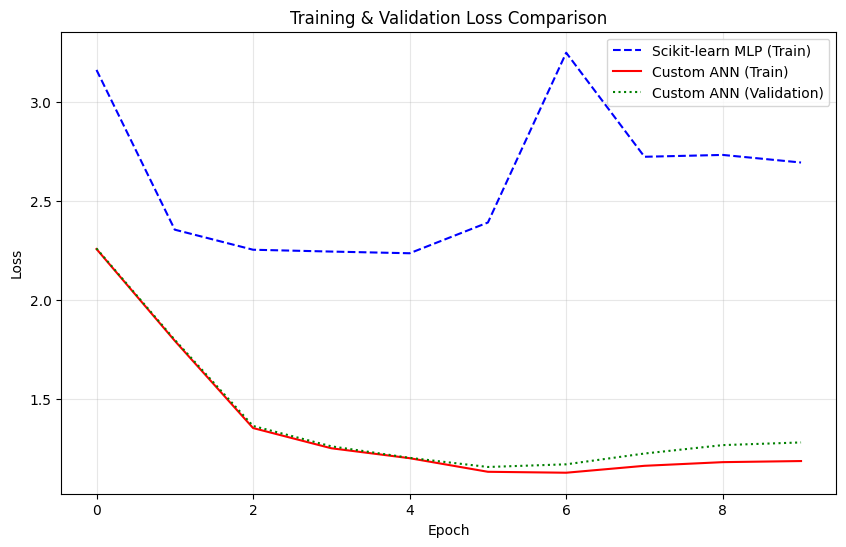

Test Accuracy: 0.8232


In [11]:
try:
    print("\nTraining scikit-learn MLP...")
    mlp_loss = train_sklearn_mlp(config, X_train, X_test, y_train, y_test)
    
    print("\nTraining custom ANN...")
    model = ANNScratch(**config)
    model.fit(X_train, y_train, X_val=X_test, y_val=y_test)
    model.save_model('saved_models/my_ann_model.pkl')
    
    custom_train_loss = model.loss_y
    custom_val_loss = model.validation_loss

    y_pred = model.predict(X_test)

    plot_results(mlp_loss, custom_train_loss, custom_val_loss)
    
    # Evaluate predictions
    if model.loss == "binary_cross_entropy":
        y_pred_class = (y_pred > 0.5).astype(int)
        accuracy = np.mean(y_pred_class == y_test)
        print(f"Test Accuracy: {accuracy:.4f}")
    elif model.loss == "categorical_cross_entropy":
        y_pred_class = np.argmax(y_pred, axis=1)
        y_test_class = np.argmax(y_test, axis=1)
        accuracy = np.mean(y_pred_class == y_test_class)
        print(f"Test Accuracy: {accuracy:.4f}")
    else: 
        mse = np.mean((y_pred - y_test)**2)
        print(f"Test MSE: {mse:.4f}")

except KeyboardInterrupt:
    print("\nTraining interrupted by user")
except Exception as e:
    print(f"\nError during training: {e}")
    raise

# Network architecture

In [12]:
visualizer = ANNVisualizer(model)

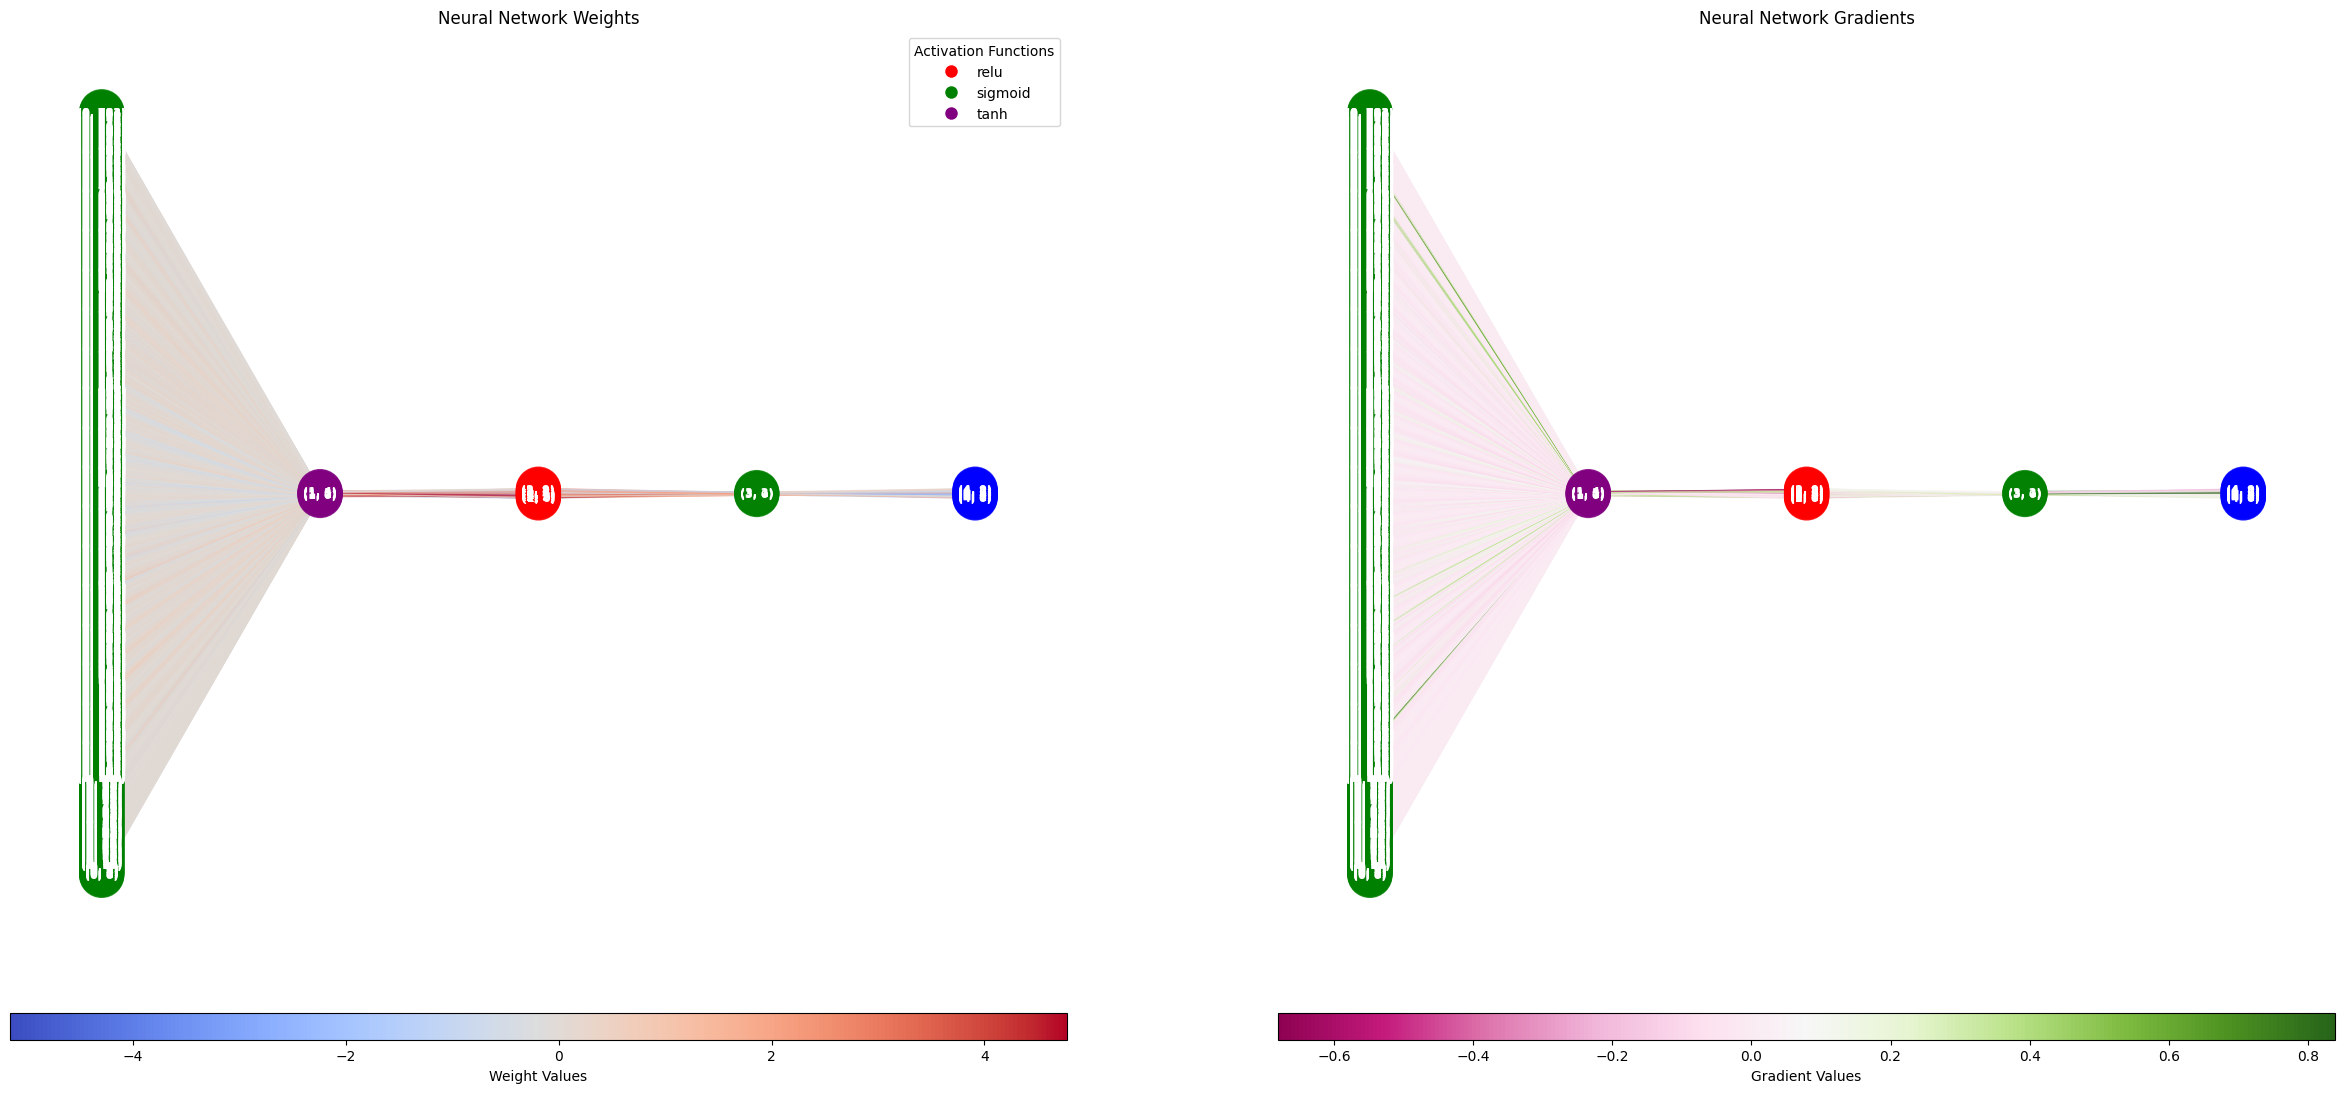

In [13]:
visualizer.visualize_network()

# Weight distributions

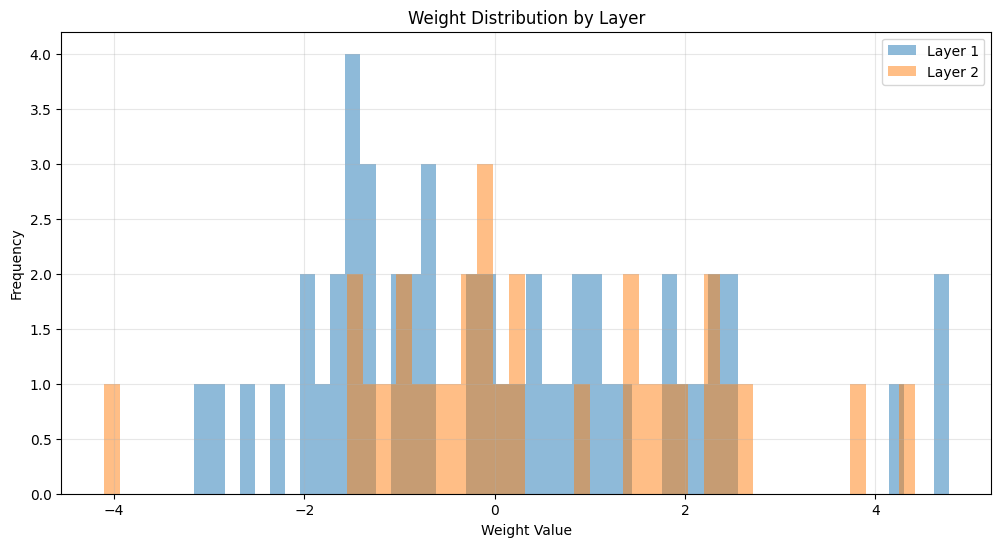

In [14]:
# layers = input("Enter layers to show (comma separated, leave empty for all): ")
# layers = [int(l) for l in layers.split(',')] if layers else None
visualizer.plot_weight_distribution(layers=[1, 2])

# Gradient distributions

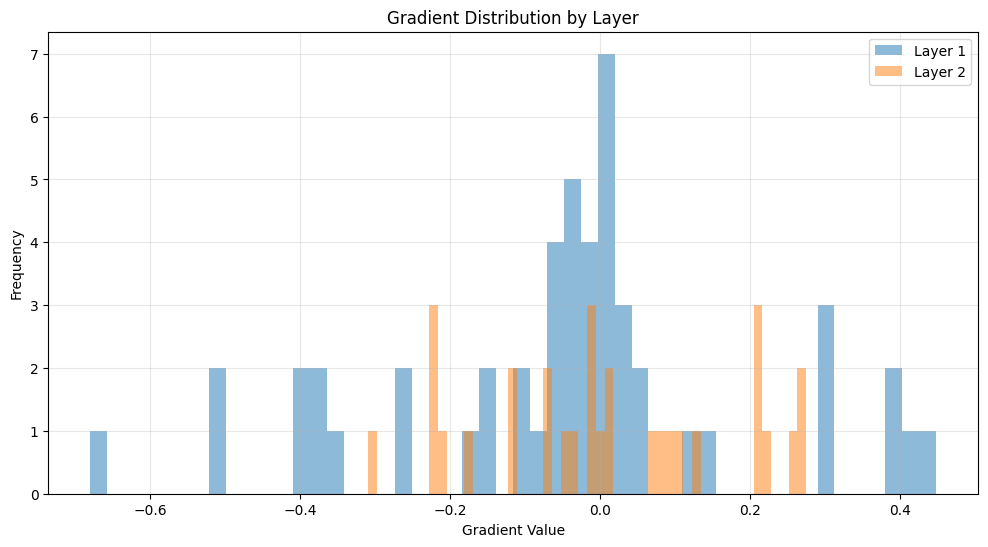

In [15]:
# layers = input("Enter layers to show (comma separated, leave empty for all): ")
# layers = [int(l) for l in layers.split(',')] if layers else None
visualizer.plot_gradient_distribution(layers=[1, 2])

# Neuron-specific inspection

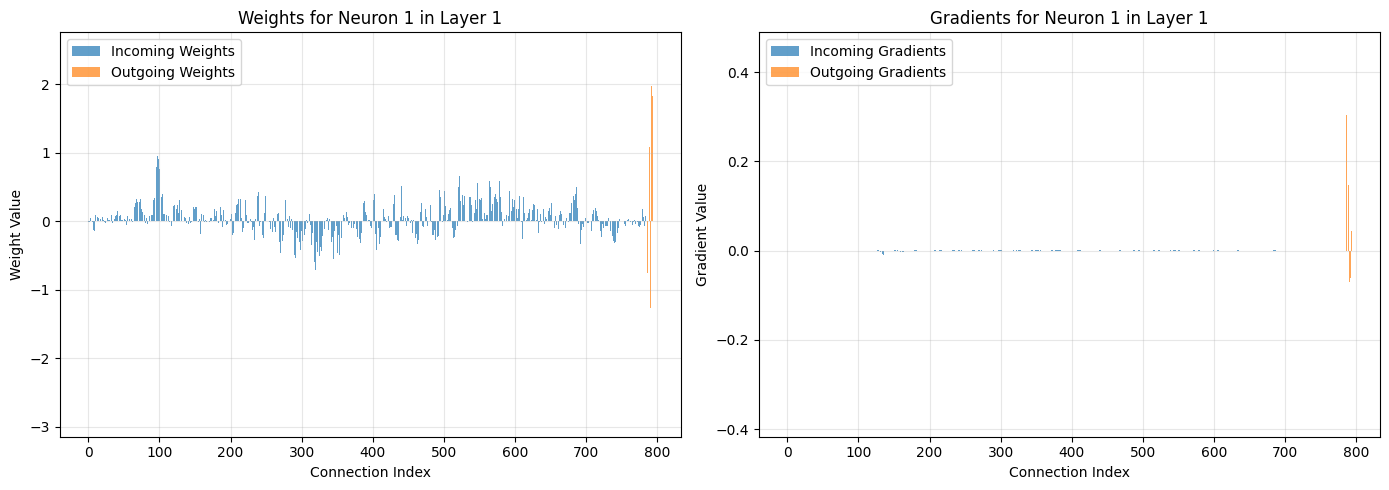

In [16]:
visualizer.plot_neuron_analysis(layer_idx=1, neuron_idx=1)

In [ ]:
model.save_model('saved_models/my_ann_model.pkl')

Model saved successfully to saved_models/my_ann_model.pkl
Model saved successfully!
